In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tfx
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Ириски

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data)

In [4]:
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])

In [5]:
iris_df['petal_area'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']
iris_df['petal_ratio'] = iris_df['petal length (cm)'] / iris_df['petal width (cm)']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,petal_area,petal_ratio
0,5.1,3.5,1.4,0.2,0,setosa,0.28,7.0
1,4.9,3.0,1.4,0.2,0,setosa,0.28,7.0
2,4.7,3.2,1.3,0.2,0,setosa,0.26,6.5
3,4.6,3.1,1.5,0.2,0,setosa,0.30,7.5
4,5.0,3.6,1.4,0.2,0,setosa,0.28,7.0


Добавили новые переменные: площадь лепестка (petal_area) и соотношение сторон лепестка (petal_ratio), которое характеризует его форму (вытянутость или округлость).

In [6]:
iris_df.hist(figsize = (15,10), bins = 50)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>,
        <Axes: title={'center': 'petal length (cm)'}>],
       [<Axes: title={'center': 'petal width (cm)'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'petal_area'}>],
       [<Axes: title={'center': 'petal_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [7]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [8]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='petal width (cm)', ylabel='Density'>

In [9]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [10]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


<Axes: >

## Нейронная сеть

In [11]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 
            'petal width (cm)', 'petal_area', 'petal_ratio']]
y = iris_df['target']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42 )

In [14]:
model = Sequential([
    Dense(10, input_shape=(6,), activation='relu', name='input'),
    Dense(10, activation='relu', name='hidden'),
    Dense(3, activation='softmax', name='output')
])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [17]:
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop],
                    verbose=0)

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Финальная точность: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0213
Финальная точность: 100.00%


Добавление новых признаков существенно увеличила точность модели, а использование нормализации обеспечила ей стабильность: даже если мы изменим данные на пару миллиметров модель от этого не сломается.

In [19]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Точность на обучении: {train_acc*100:.2f}%")
print(f"Точность на тесте: {test_acc*100:.2f}%")
print(f"Разрыв: {(train_acc - test_acc)*100:.2f}%")

Точность на обучении: 99.05%
Точность на тесте: 100.00%
Разрыв: -0.95%


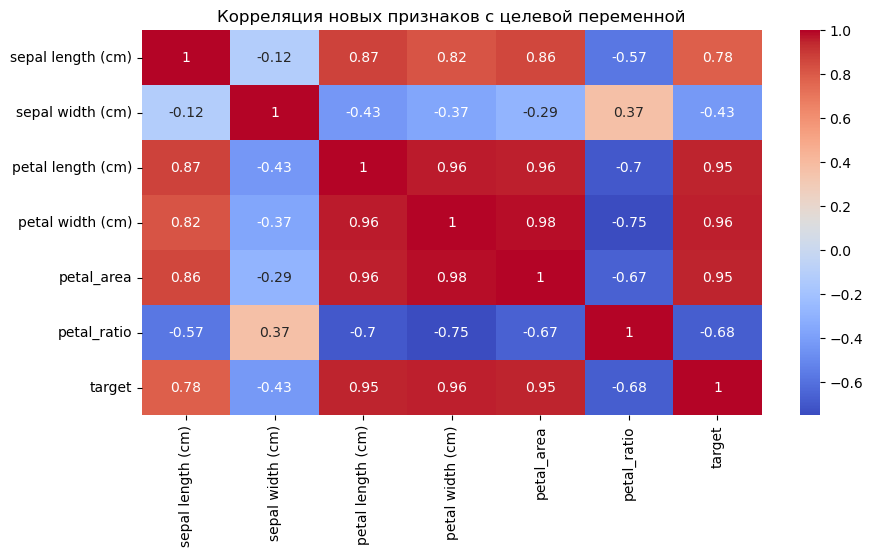

In [32]:
new_corr = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 
            'petal width (cm)', 'petal_area', 'petal_ratio', 'target']].corr()
sns.heatmap(new_corr, annot=True, cmap='coolwarm')
plt.title('Корреляция новых признаков с целевой переменной')
plt.show()

petal length, petal width и petal_area. Каждый из этих признаков имеет высокую точность с сортом ириса. Это значит, что по лепестку можно точно узнать его вид. 

In [21]:
typical_values = iris_df.groupby('name').mean()

print("Средние значения признаков для каждого сорта:")
typical_values

Средние значения признаков для каждого сорта:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal_area,petal_ratio
name,,,,,,,
setosa,5.006,3.428,1.462,0.246,0.0,0.3656,6.908000
versicolor,5.936,2.770,4.260,1.326,1.0,5.7204,3.242837
virginica,6.588,2.974,5.552,2.026,2.0,11.2962,2.780662


Setosa(0) - маленькие и узкие лепестки. Маленькая  площадь лепестка.

Versicolor(1) - средний размер. Площадь в среднем значении.

Virginica(2) - широкий лепесток, длина может быть схожа с Versicolor. Площадь выше средней. Самый низкий petal_ratio. Это значит, что лепестки Virginica не просто длинные, но и очень широкие (более округлые), что подтверждается высокой корреляцией с petal_area.

С ростом площади (petal_area) лепесток станстановится более округлым, поэтому соотношение сторон падает (petal_ratio). 

Основная проблема в путанице между Versicolor и Virginaca заключалось в том, что их длина могла совпадать: из-за этого модели трудно было определить к какому сорту они подлежат. Чтобы разрешить эту проблему, мы используем petal_ratio. Он помогает разделить Versicolor и Virginica. У них могут быть похожие значения длины, но разная форма лепестка. Если лепесток длинный, но при этом худой (versicolor), petal_ratio будет высоким. Если он широкий и мощный (virginica) - низким.

С помощью комбинации этих признаков мы добились того, что модель точно понимает биологические особенности цветков.

In [22]:
predictions = model.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [23]:
test = np.argmax(predictions,axis=1)
prediction = test.flatten()

In [24]:
y = iris_df['target']
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



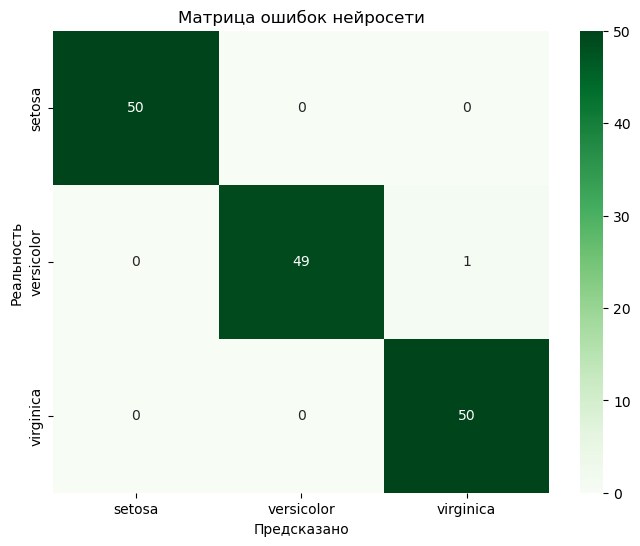

In [25]:
cm = confusion_matrix(y, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Предсказано')
plt.ylabel('Реальность')
plt.title('Матрица ошибок нейросети')
plt.show()

Ранее мы могли видеть 100%-ую точность, полученную на тестовых данных. Это могло говорить о том, что наша модель переобучилась, но, увидев результаты на обучении (0,98% - 0,99%) на полном датасете, наличие одной единственной ошибки говорит о том, что модель не выучивала данные, которые относятся к сортам ириса, а вывела общее правило и проигнорировала аномалию.

Проще говоря, модель предпочла ошибиться на аномалии и сохранить простое и четкое правило, чем подстроиваться под эту аномалию и создавать более сложное правило, которое при дальшнейшем использовании могло привести к ошибочным результатам.

## Random Forest

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_predictions)
print(f"Точность Random Forest: {rf_acc * 100:.2f}%")

Точность Random Forest: 100.00%


In [27]:
print("Отчет классификации:")
print(classification_report(y_test, rf_predictions, target_names=iris.target_names))

Отчет классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



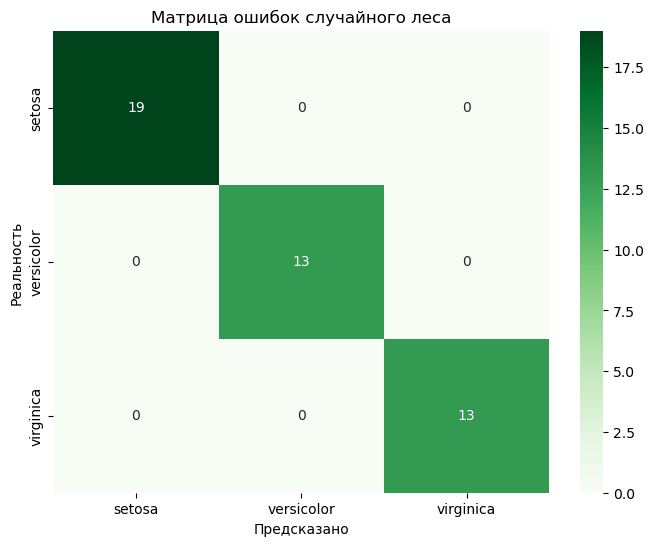

In [28]:
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Предсказано')
plt.ylabel('Реальность')
plt.title('Матрица ошибок случайного леса')
plt.show()

In [33]:
importances = rf_model.feature_importances_
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 
            'petal width (cm)', 'petal_area', 'petal_ratio', 'target']
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features, palette='magma')
plt.title('Важность признаков в Random Forest')
plt.show()

NameError: name 'features' is not defined

Модель смогла распознать значимость добавленных ранее признаков и успешно их использовала для разделения сортов без использования весов. Лес обеспечил тот же идеальный результат, но с меньшими усилиями.

## SVM

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

In [ ]:
svm_predictions = svm_model.predict(X_test)
print(f"Точность SVM: {accuracy_score(y_test, svm_predictions) * 100:.2f}%")

In [ ]:
print("Отчет по классификации:")
print(classification_report(y_test, svm_predictions, target_names=iris.target_names))

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Матрица ошибок SVM')
plt.xlabel('Предсказано')
plt.ylabel('Реальность')
plt.show()

SVM также показал хорошие результаты, но не лучшие. В технике реализации он проще, но значения у него похуже.

Среди трех методов лучшим оказался, по моему мнению, Random Forest, так как он потребовал минимальные затраты, но дал наилучший результат. При таком минимальном количестве данных он - это лучшее решение.